In [3]:
## AlexNet Assignment with Custom dataset 

In [4]:
import tensorflow as tf
from tensorflow import keras

In [51]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation
 

In [8]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 KB 620.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=69d58f2d27558d6935e9fb29f5846b46baa19fdf958373631c80a26d4c418f90
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


In [10]:
# import tflearn.datasets.
# x, y = citrus_leaves.load_data(one_hot=True)

ModuleNotFoundError: ignored

In [11]:
!pip install tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import tensorflow_datasets  as tfds

In [13]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [20]:
df = tfds.load( 'citrus_leaves', split='train', as_supervised=True)

In [21]:
df

<PrefetchDataset element_spec=(TensorSpec(shape=(?, ?, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [24]:
df = df.take(1)  # Only take a single example

for image, label in tfds.as_numpy(df):
  print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 1


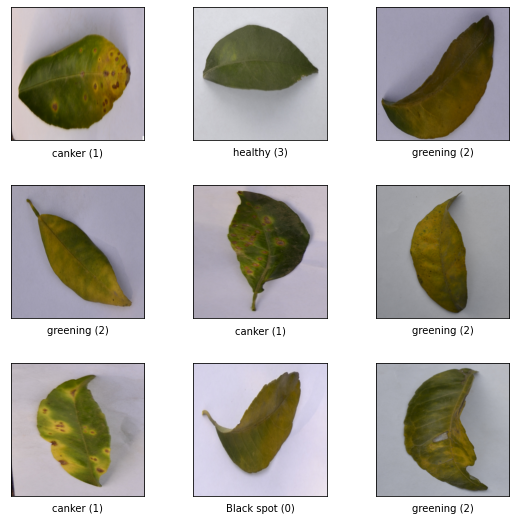

In [25]:
ds, info = tfds.load('citrus_leaves', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

In [26]:
print(info)

tfds.core.DatasetInfo(
    name='citrus_leaves',
    full_name='citrus_leaves/0.1.2',
    description="""
    The original citrus dataset contains 759 images of healthy and unhealthy citrus
    fruits and leaves. However, for now we only export 594 images of citrus leaves
    with the following labels: Black Spot, Canker, Greening, and Healthy. The
    exported images are in PNG format and have 256x256 pixels.
    
    NOTE: Leaf images with Melanose label were dropped due to very small count and
    other non-leaf images being present in the same directory.
    
    Dataset URL: https://data.mendeley.com/datasets/3f83gxmv57/2
    License: http://creativecommons.org/licenses/by/4.0
    """,
    homepage='https://data.mendeley.com/datasets/3f83gxmv57/2',
    data_path='/root/tensorflow_datasets/citrus_leaves/0.1.2',
    file_format=tfrecord,
    download_size=63.87 MiB,
    dataset_size=37.89 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
  

In [27]:
print(info.features["label"].names)

['Black spot', 'canker', 'greening', 'healthy']


In [30]:
print(ds.shape)

AttributeError: ignored

In [31]:
im, lbl = tfds.as_numpy(tfds.load(
    'citrus_leaves',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

print(type(im), im.shape)

<class 'numpy.ndarray'> (594, 256, 256, 3)


In [35]:
im

array([[[[217, 202, 203],
         [218, 202, 204],
         [220, 204, 205],
         ...,
         [195, 186, 203],
         [192, 186, 201],
         [192, 185, 201]],

        [[218, 203, 203],
         [219, 204, 204],
         [220, 204, 205],
         ...,
         [196, 187, 204],
         [192, 185, 200],
         [192, 185, 201]],

        [[218, 204, 204],
         [219, 204, 205],
         [220, 204, 205],
         ...,
         [195, 185, 202],
         [194, 186, 203],
         [194, 187, 202]],

        ...,

        [[ 76,  51,  25],
         [ 87,  61,  32],
         [ 91,  62,  38],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 62,  39,  16],
         [ 85,  60,  34],
         [100,  72,  45],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 56,  35,  18],
         [ 68,  45,  22],
         [102,  76,  48],
         ...,
         [255, 255, 255],
        

In [36]:
lbl

array([1, 3, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 3, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 3, 0, 1, 3, 1, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 0, 0, 1, 3, 1, 3, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2,
       0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 3, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 3, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2,
       0, 2, 0, 0, 2, 1, 0, 2, 1, 3, 2, 3, 3, 3, 2, 2, 3, 1, 3, 1, 3, 0,
       2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 3,
       1, 2, 1, 3, 2, 3, 0, 0, 1, 1, 2, 2, 0, 3, 2, 0, 1, 0, 1, 2, 2, 1,
       3, 2, 2, 0, 0, 2, 3, 1, 0, 0, 2, 0, 3, 0, 1, 3, 0, 1, 0, 2, 0, 1,
       3, 0, 0, 2, 0, 1, 1, 3, 2, 1, 3, 0, 2, 2, 0, 1, 0, 1, 3, 1, 3, 1,
       3, 0, 0, 0, 0, 0, 1, 2, 0, 3, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 3, 0,
       0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0,
       2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2,

In [37]:
im/255

array([[[[0.85098039, 0.79215686, 0.79607843],
         [0.85490196, 0.79215686, 0.8       ],
         [0.8627451 , 0.8       , 0.80392157],
         ...,
         [0.76470588, 0.72941176, 0.79607843],
         [0.75294118, 0.72941176, 0.78823529],
         [0.75294118, 0.7254902 , 0.78823529]],

        [[0.85490196, 0.79607843, 0.79607843],
         [0.85882353, 0.8       , 0.8       ],
         [0.8627451 , 0.8       , 0.80392157],
         ...,
         [0.76862745, 0.73333333, 0.8       ],
         [0.75294118, 0.7254902 , 0.78431373],
         [0.75294118, 0.7254902 , 0.78823529]],

        [[0.85490196, 0.8       , 0.8       ],
         [0.85882353, 0.8       , 0.80392157],
         [0.8627451 , 0.8       , 0.80392157],
         ...,
         [0.76470588, 0.7254902 , 0.79215686],
         [0.76078431, 0.72941176, 0.79607843],
         [0.76078431, 0.73333333, 0.79215686]],

        ...,

        [[0.29803922, 0.2       , 0.09803922],
         [0.34117647, 0.23921569, 0.1254902 ]

In [40]:
x = im/255
print(x.shape)

(594, 256, 256, 3)


In [50]:
#reshaping problem
a = a.reshape(a.shape[0],224,224,1)
a.shape

ValueError: ignored

In [41]:
y = lbl
print(y.shape)

(594,)


In [53]:
#creating model
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96,kernel_size=(11,11),input_shape=(256,256,3),strides=(4,4),padding="valid"))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))




# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))


# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))



# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))



# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(256*256*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))


# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))


# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 activation (Activation)     (None, 62, 62, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                  

In [56]:
# Compile 
# opt = tf.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [59]:
y_binary

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [60]:
model.fit(x, y_binary, batch_size=64, epochs=5, verbose=1,validation_split=0.2, shuffle=True)

Train on 475 samples, validate on 119 samples
Epoch 1/5
475/475 [==============================] - ETA: 0s - loss: 2.6159 - acc: 0.2695

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


475/475 [==============================] - 12s 25ms/sample - loss: 2.6159 - acc: 0.2695 - val_loss: 1.3160 - val_acc: 0.3697
Epoch 2/5
475/475 [==============================] - 1s 3ms/sample - loss: 1.3457 - acc: 0.2758 - val_loss: 1.2943 - val_acc: 0.3697
Epoch 3/5
475/475 [==============================] - 1s 3ms/sample - loss: 1.3254 - acc: 0.3305 - val_loss: 1.3057 - val_acc: 0.3697
Epoch 4/5
475/475 [==============================] - 1s 3ms/sample - loss: 1.3219 - acc: 0.3368 - val_loss: 1.2907 - val_acc: 0.3697
Epoch 5/5
475/475 [==============================] - 1s 3ms/sample - loss: 1.3168 - acc: 0.3116 - val_loss: 1.2938 - val_acc: 0.3697
